# Disease Enrichment through DisGeNET

In [3]:
#importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [4]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 10

DisGeNET database (downloaded from disgenet.org on 22-Nov-2022, v7.0) used to get the disease enrichment values. The enrichment was done in R using the Fisher's exact test for finding the p-values, and it was corrected using the Benjamini-Hochberg method. We considered a cut-off for GDA score > 0.3, EI > 0.5. 

Note:
The results for no-cut-off diseases was similar when compared to the disgenet2r package, thus validating our enrichment code.

The following is the output from the enrichment analysis.

In [9]:
# Importing the disease enrichment data from disgenet
disgenetenriched = pd.read_csv('Disgenet_diease_enrichment_gda03_ei05.csv',header = 0)
print(disgenetenriched.shape)
disgenetenriched

(899, 8)


,Unnamed: 0,Disease,TotalGeneCount,TotalGenes,EPEKGeneCount,EPEKGeneList,PValue,AdjustedPValue
0,1,Ulcerative Colitis,56,IL1B;CXCL8;MASP2;ICAM1;IL1B;CXCL8;RELA;SLC11A1...,8,IL1B;CXCL8;IL1B;CXCL8;STAT3;TNF;CDH1;STAT3;IL1...,1.165766e-04,0.001455
1,2,Septicemia,19,IL10;PROC;ADM;MAPK1;TNF;MMP9;TGFB1;CASP3;ANGPT...,5,ADM;TNF;ANGPT1;NOS2;NOS2;TLR4;TNF;TNF,1.181224e-04,0.001455
2,3,Sepsis,19,IL10;PROC;ADM;MAPK1;TNF;MMP9;TGFB1;CASP3;ANGPT...,5,ADM;TNF;ANGPT1;NOS2;NOS2;TLR4;TNF;TNF,1.181224e-04,0.001455
3,4,Colorectal Carcinoma,359,CDH1;PTGS2;SOD2;CTNNB1;PTGS2;IGF2;MKI67;TP53;C...,23,CDH1;PTGS2;CTNNB1;PTGS2;PTGS2;CTNNB1;POSTN;PTG...,1.349866e-04,0.001640
4,5,Malignant neoplasm of prostate,416,PTGS2;GSTP1;ERBB2;CYP1A1;GSTM1;GSTT1;SLC7A1;PL...,25,PTGS2;VEGFA;PTGS2;STAT3;PTGS2;EGFR;EGFR;IGFBP3...,1.375848e-04,0.001649
...,...,...,...,...,...,...,...,...
894,895,Undifferentiated carcinoma,14,BCL2;PTGS2;KRAS;BRCA1;FN1;PADI4;EGFR;STAT3;CDH...,6,BCL2;PTGS2;FN1;EGFR;STAT3;CDH1;CDH1;CDH1,9.152914e-07,0.000033
895,896,Myocardial Infarction,75,F2;ICAM1;SELL;NOS2;PLAT;PLAT;NOS3;APOE;THBD;PL...,14,NOS2;NOS2;PAPPA;IL1B;CKM;IL1B;IL6;TNF;IL1B;IL6...,9.313511e-09,0.000001
896,897,Diabetic Retinopathy,10,ICAM1;VEGFA;AGT;VEGFA;AGTR1;THBS1;SOD1;CRP;PON...,4,VEGFA;VEGFA;AGTR1;SOD1;CRP;VEGFA,9.643924e-05,0.001239
897,898,"Heart Failure, Right-Sided",10,EDN1;EDN1;AGT;AGT;TNF;TNF;NR3C2;CRP;EDN1;EDN1;...,4,TNF;TNF;CRP;AGTR1;TNF;TNF;AGTR1;AGTR1;HTR2B;TNF,9.643924e-05,0.001239


In [10]:
epekgenesindisgenet = []
for i in range(disgenetenriched.shape[0]):
    epekgenelist = disgenetenriched['EPEKGeneList'][i].split(';')
    epekgenesindisgenet = epekgenesindisgenet + epekgenelist
len(list(set(epekgenesindisgenet)))

187

NOTE:

The gene symbols have been duplicated due to SQL query limitations. The count corresponds to the actual number of gene symbols in each disease

The diseases with p-value < 0.01, and a total gene-count >50 considered from the analysis. This resulted in 49 enriched diseases. The adjusted p-values were scaled using $scaled\_value = -log(AdjustedPValue)$ to scale the sizes of the bubbles based on the significance values (smaller the p-value, the greater significance).

In [11]:
# selecting the diseases with p < 0.01
disgenet0_01 = disgenetenriched[disgenetenriched.AdjustedPValue < 0.01]
#selecting the diseases with totalgenes > 50
disgenet0_01_min50 = disgenet0_01[disgenet0_01.TotalGeneCount > 50]
print('Number of diseases = ',disgenet0_01_min50.shape[0])
# Sorted values basedon the adjusted P values.
disgenetsort = disgenet0_01_min50.sort_values('AdjustedPValue')
#scaled the p-values.
disgenetsort['MaxMinscale']=disgenetsort['AdjustedPValue'].apply(lambda x: -np.log(x))
print(disgenetsort.shape)
disgenetsort

Number of diseases =  49
(49, 9)


,Unnamed: 0,Disease,TotalGeneCount,TotalGenes,EPEKGeneCount,EPEKGeneList,PValue,AdjustedPValue,MaxMinscale
855,856,Inflammation,61,UCN;MPO;NGF;LTB4R;PTGS2;IL1B;IL6;IL10;TNF;NOS2...,16,UCN;PTGS2;IL1B;IL6;TNF;NOS2;PTGS2;TNF;CRP;TNF;...,3.097827e-12,2.784947e-09,19.699037
860,861,Hypertensive disease,164,BCL2;POMC;POMC;AGT;AGT;EDN1;POMC;POMC;POMC;POM...,22,BCL2;HSD11B2;VDR;CAT;FN1;CRP;PTGS2;PTGS2;PTGS2...,3.752636e-10,1.154448e-07,15.974473
845,846,Colonic Neoplasms,68,BCL2;APC;KRAS;IFNG;ERBB2;SLC16A1;APC;MYC;PTGS2...,14,BCL2;PTGS2;CTNNB1;CTNNB1;TNF;TNF;CTNNB1;EGFR;I...,2.417338e-09,5.432966e-07,14.425610
884,885,Malignant tumor of colon,113,BCL2;APC;KRAS;IFNG;ERBB2;SLC2A1;APC;LTF;MYC;PT...,17,BCL2;PTGS2;CTNNB1;CTNNB1;TNF;TNF;CTNNB1;EGFR;A...,7.183932e-09,1.076392e-06,13.741895
895,896,Myocardial Infarction,75,F2;ICAM1;SELL;NOS2;PLAT;PLAT;NOS3;APOE;THBD;PL...,14,NOS2;NOS2;PAPPA;IL1B;CKM;IL1B;IL6;TNF;IL1B;IL6...,9.313511e-09,1.196121e-06,13.636427
831,832,Adenocarcinoma,90,PLAU;PTGS2;TP53;TP53;CTNNB1;PPARG;KRAS;PTGER1;...,15,PTGS2;CTNNB1;CTNNB1;SELENBP1;CA2;SELENBP1;CTNN...,1.371824e-08,1.541587e-06,13.382698
843,844,"Kidney Failure, Acute",56,TGFB1;SPP1;HSPA1A;EGFR;SLC22A12;TNF;POMC;KLK1;...,12,EGFR;TNF;TNF;LCN2;TNF;VEGFA;VEGFA;IL6;LCN2;VEG...,2.166541e-08,2.164134e-06,13.043490
869,870,Congestive heart failure,85,EDN1;NPPA;NPPB;NPPB;NPPB;NPPB;EDN1;CSF2;ALB;AG...,14,IL1B;IL6;TNF;TNF;VEGFA;VEGFA;CAT;CRP;IL6;AGTR1...,4.977492e-08,4.067968e-06,12.412367
830,831,Breast Carcinoma,452,CDKN1B;CHEK2;EP300;ERBB2;ERBB2;ERBB4;AKT1;AKT2...,33,CTNNB1;BCL2;GPX1;STAT3;NOS2;PTGS2;CYP24A1;VDR;...,1.172282e-07,7.527728e-06,11.796917
832,833,Stomach Neoplasms,92,KLF6;ERBB2;ERBB2;ERBB3;FGFR2;FGFR2;APC;MET;MUT...,14,CDH1;CDH1;PTGS2;CDH1;TNF;TNF;GAST;IL1B;EGFR;EG...,1.397749e-07,8.377175e-06,11.690000


In [12]:
# resetting index
disgenetsort.reset_index(inplace=True)
print(disgenetsort.shape)
disgenetsort

(49, 10)


,index,Unnamed: 0,Disease,TotalGeneCount,TotalGenes,EPEKGeneCount,EPEKGeneList,PValue,AdjustedPValue,MaxMinscale
0,855,856,Inflammation,61,UCN;MPO;NGF;LTB4R;PTGS2;IL1B;IL6;IL10;TNF;NOS2...,16,UCN;PTGS2;IL1B;IL6;TNF;NOS2;PTGS2;TNF;CRP;TNF;...,3.097827e-12,2.784947e-09,19.699037
1,860,861,Hypertensive disease,164,BCL2;POMC;POMC;AGT;AGT;EDN1;POMC;POMC;POMC;POM...,22,BCL2;HSD11B2;VDR;CAT;FN1;CRP;PTGS2;PTGS2;PTGS2...,3.752636e-10,1.154448e-07,15.974473
2,845,846,Colonic Neoplasms,68,BCL2;APC;KRAS;IFNG;ERBB2;SLC16A1;APC;MYC;PTGS2...,14,BCL2;PTGS2;CTNNB1;CTNNB1;TNF;TNF;CTNNB1;EGFR;I...,2.417338e-09,5.432966e-07,14.425610
3,884,885,Malignant tumor of colon,113,BCL2;APC;KRAS;IFNG;ERBB2;SLC2A1;APC;LTF;MYC;PT...,17,BCL2;PTGS2;CTNNB1;CTNNB1;TNF;TNF;CTNNB1;EGFR;A...,7.183932e-09,1.076392e-06,13.741895
4,895,896,Myocardial Infarction,75,F2;ICAM1;SELL;NOS2;PLAT;PLAT;NOS3;APOE;THBD;PL...,14,NOS2;NOS2;PAPPA;IL1B;CKM;IL1B;IL6;TNF;IL1B;IL6...,9.313511e-09,1.196121e-06,13.636427
5,831,832,Adenocarcinoma,90,PLAU;PTGS2;TP53;TP53;CTNNB1;PPARG;KRAS;PTGER1;...,15,PTGS2;CTNNB1;CTNNB1;SELENBP1;CA2;SELENBP1;CTNN...,1.371824e-08,1.541587e-06,13.382698
6,843,844,"Kidney Failure, Acute",56,TGFB1;SPP1;HSPA1A;EGFR;SLC22A12;TNF;POMC;KLK1;...,12,EGFR;TNF;TNF;LCN2;TNF;VEGFA;VEGFA;IL6;LCN2;VEG...,2.166541e-08,2.164134e-06,13.043490
7,869,870,Congestive heart failure,85,EDN1;NPPA;NPPB;NPPB;NPPB;NPPB;EDN1;CSF2;ALB;AG...,14,IL1B;IL6;TNF;TNF;VEGFA;VEGFA;CAT;CRP;IL6;AGTR1...,4.977492e-08,4.067968e-06,12.412367
8,830,831,Breast Carcinoma,452,CDKN1B;CHEK2;EP300;ERBB2;ERBB2;ERBB4;AKT1;AKT2...,33,CTNNB1;BCL2;GPX1;STAT3;NOS2;PTGS2;CYP24A1;VDR;...,1.172282e-07,7.527728e-06,11.796917
9,832,833,Stomach Neoplasms,92,KLF6;ERBB2;ERBB2;ERBB3;FGFR2;FGFR2;APC;MET;MUT...,14,CDH1;CDH1;PTGS2;CDH1;TNF;TNF;GAST;IL1B;EGFR;EG...,1.397749e-07,8.377175e-06,11.690000


In [13]:
# re-ordering the dataframe and correcting the duplication gene-symbols
disgenet_enrichement = [['Disease','OverlapGenes','TotalGenes','OverlapRatio','AdjustedPValue','NodeSize','TotalGeneList','OverlapGeneList']]
for i in range(disgenetsort.shape[0]):
    disease = disgenetsort['Disease'][i]
    totalgenes = float(disgenetsort['TotalGeneCount'][i])
    overlapgenes = float(disgenetsort['EPEKGeneCount'][i])
    overlapratio = overlapgenes/totalgenes
    adjpval = disgenetsort['AdjustedPValue'][i]
    nodesize = disgenetsort['MaxMinscale'][i]
    totalgenelist = disgenetsort['TotalGenes'][i].split(';')
    totalgenelist = list(set(totalgenelist))
    totalgenecorrected = ';'.join(totalgenelist)
    epekgeneslist = disgenetsort['EPEKGeneList'][i].split(';')
    epekgeneslist = list(set(epekgeneslist))
    epekgenescorrected = ';'.join(epekgeneslist)
    disgenet_enrichement.append([disease,overlapgenes,totalgenes,overlapratio,adjpval,nodesize,totalgenecorrected,epekgenescorrected])
    
disgenet_enrichmentdf = pd.DataFrame(disgenet_enrichement[1:],columns = disgenet_enrichement[0])
print(disgenet_enrichmentdf.shape)
disgenet_enrichmentdf

(49, 8)


,Disease,OverlapGenes,TotalGenes,OverlapRatio,AdjustedPValue,NodeSize,TotalGeneList,OverlapGeneList
0,Inflammation,16.0,61.0,0.262295,2.784947e-09,19.699037,IL13;TLR2;PTGES;TRPV1;PROCR;LTB4R;CALCA;ICAM1;...,TNF;TLR4;VEGFA;TLR2;LCN2;SCGB1A1;IL6;UCN;CRP;P...
1,Hypertensive disease,22.0,164.0,0.134146,1.154448e-07,15.974473,GRK2;GLP1R;UMOD;VWF;TRPC3;GSK3B;CALCA;HP;F12;S...,HSD11B2;PLG;NOS2;HP;RGS2;CRP;IL1B;ALAD;VDR;TLR...
2,Colonic Neoplasms,14.0,68.0,0.205882,5.432966e-07,14.425610,TAGLN;TYMS;BAX;KRAS;CDX2;JUN;HSPB1;ICAM1;TNFRS...,TNF;CXCL10;VEGFA;PROM1;CTNNB1;BCL2;PTGS2;IL1B;...
3,Malignant tumor of colon,17.0,113.0,0.150442,1.076392e-06,13.741895,ALDH1B1;KRAS;CDX2;BRD4;TNFRSF10A;SERTAD1;CCND2...,TNF;VEGFA;HES1;PROM1;CTNNB1;BCL2;A2M;ATP7A;IL1...
4,Myocardial Infarction,14.0,75.0,0.186667,1.196121e-06,13.636427,HSD11B2;BAX;PSMA6;MIA3;REN;PHACTR1;ACTA2;GSK3B...,PAPPA;TNF;LGALS3;HP;HSD11B2;BCL2;IL6;IL1RN;SOD...
5,Adenocarcinoma,15.0,90.0,0.166667,1.541587e-06,13.382698,KRAS;KDR;PIK3CA;TNFRSF10A;KRT8;CDKN1C;ARID1A;T...,TNF;VEGFA;CA2;CTNNB1;PRL;BCL2;SELENBP1;KDR;CXC...
6,"Kidney Failure, Acute",12.0,56.0,0.214286,2.164134e-06,13.043490,SERPINA1;PLG;BAX;TLR2;GSK3B;NOS2;EPO;HP;HSPA1A...,TNF;VEGFA;TLR4;PLG;TLR2;LCN2;IL6;NOS2;HP;TFF3;...
7,Congestive heart failure,14.0,85.0,0.164706,4.067968e-06,12.412367,ATP2A2;CSF3;GRK2;ADRA2C;VWF;GSK3B;TNFRSF1A;HAN...,VEGFA;TNF;HTR2B;TLR2;PRL;CAT;IL6;CRP;PTGS2;CXC...
8,Breast Carcinoma,33.0,452.0,0.073009,7.527728e-06,11.796917,STMN1;KDR;H2AX;GATA3;ARID1A;CYP1A1;CASP7;NCOR1...,RSPO3;PER3;HES1;PAEP;FST;KDR;NOS2;HP;TNFSF10;S...
9,Stomach Neoplasms,14.0,92.0,0.152174,8.377175e-06,11.690000,KRAS;PIK3CA;CHFR;BIRC2;BRAF;TIMP3;FHIT;PTPRG;S...,TNF;LGALS3;MUC1;IGFBP3;KISS1;CDH1;PTGS2;IL6;IL...


In [22]:
# Saving the dataframe
#disgenet_enrichmentdf.to_excel('Disgenet_p0_01.xlsx',index=False)

The disease code, diseaseclass code and diseaseclass name have been accessed from the database and added manually to the list using the Rcode_DiseaseClassaddition.R. The following is the resulting dataframe

In [19]:
disgenet = pd.read_excel('DisGeNET_diseaseenrichment_p0_01_min50.xlsx')
disgenet['OverlapGeneList'] = disgenet['OverlapGeneList'].apply(lambda x: x.replace(';','|'))
disgenet['DiseaseClassNames'] = disgenet['DiseaseClassNames'].apply(lambda x: x.replace(';   ','|'))
print(disgenet.shape)
disgenet

(49, 13)


,Disease,DiseaseCode,OverlapGenes,TotalGenes,OverlapRatio,AdjustedPValue,NodeSize,TotalGeneList,OverlapGeneList,DiseaseClassCodesFirst,DiseaseClassCodesSecond,DiseaseClassCodesThird,DiseaseClassNames
0,Malignant Neoplasms,C0006826,13,124,0.104839,4.675920e-04,7.667913,KCNH2;ERCC1;LCN2;ERBB2;CCND1;IL1B;GPR55;NOTCH1...,IL1B|PTGS2|CITED2|UGT1A1|CAT|KDR|VEGFA|EGFR|VD...,C04,-,-,Neoplasms
1,Glioblastoma Multiforme,C1621958,9,81,0.111111,2.977705e-03,5.816602,HSPB8;HEY1;IDH2;SEPTIN14;MGMT;IL1B;CDK3;CSTB;N...,IL1B|CXCL8|PROM1|VEGFA|EGFR|HES1|TNFSF10|FN1|C...,C04,-,-,Neoplasms
2,Carcinoma,C0007097,10,83,0.120482,1.044733e-03,6.863994,DES;CCND1;STAT3;LGALS7;MET;TGFBR2;FN1;TYMP;TP5...,STAT3|CDH1|TLR4|EGFR|IL6ST|BCL2|FN1|VHL|PTGS2|PGR,C04,-,-,Neoplasms
3,Neoplasms,C0027651,8,64,0.125000,2.977320e-03,5.816732,GLP1R;CAT;KCNH2;GSTT1;PPARA;GPX3;APOBEC3A;ERCC...,IL1B|CITED2|CAT|VEGFA|VDR|LCN2|SST|PTGS2,C04,-,-,Neoplasms
4,Glioblastoma,C0017636,9,66,0.136364,9.181090e-04,6.993195,MMP9;NF1;GSTT1;MDM4;CTSK;APC;PROM1;PTEN;NDRG1;...,IL1B|CXCL8|PROM1|VEGFA|EGFR|HES1|TNFSF10|FN1|C...,C04,-,-,Neoplasms
5,Adenocarcinoma,C0001418,15,90,0.166667,1.541590e-06,13.382698,AZGP1;SPP1;ERBB2;CCND1;CYP19A1;IL1B;STAT3;CYP2...,IL1B|STAT3|CXCL8|TNF|KDR|PRL|VEGFA|EGFR|GAST|C...,C04,-,-,Neoplasms
6,Malignant neoplasm of lung,C0242379,17,208,0.081731,6.875920e-04,7.282314,AZGP1;SPP1;MARCKS;ERCC1;HEY1;MIR155;ERBB2;NRG1...,IL1B|CCL18|TNF|IL6|PRDX6|TLR4|GAST|EGFR|CRP|HE...,C04,C08,-,Neoplasms|Respiratory Tract Diseases
7,Lung Neoplasms,C0024121,14,138,0.101449,3.456410e-04,7.970109,SPP1;MARCKS;ERCC1;MIR155;ERBB2;NRG1;JUN;IFNG;C...,IL1B|TNF|IL6|PRDX6|TLR4|GAST|EGFR|CRP|HES1|CTN...,C04,C08,-,Neoplasms|Respiratory Tract Diseases
8,Malignant neoplasm of prostate,C0376358,25,416,0.060096,1.649183e-03,6.407475,VPS52;HSPA1A;IL1RN;MME;ERBB2;ELAC2;VIM;ERG;CYP...,CXCL12|IL1RN|LIFR|ETV1|IGFBP3|STAT3|IGFBP6|CXC...,C04,C12,-,Neoplasms|Male Urogenital Diseases
9,Prostatic Neoplasms,C0033578,20,277,0.072202,8.157910e-04,7.111353,AZGP1;EAF2;XRCC1;PDP1;IL1RN;MME;ERBB2;SULT1E1;...,CXCL12|IL1RN|ETV1|IGFBP3|STAT3|CXCL8|RXRA|EGFR...,C04,C12,-,Neoplasms|Male Urogenital Diseases


In [20]:
disgenet_supp = disgenet[['DiseaseCode','Disease','DiseaseClassNames','TotalGenes','OverlapGenes','OverlapRatio','AdjustedPValue','OverlapGeneList']]
#disgenet_supp.to_excel('disease_supptable.xlsx',index = False)

The diseaseclass codes have been seperated into different columns, as a single disease can be attributes to more than one disease class.

## Bubble Plot

Overlap score  (overlapratio) vs diseases bubble plot, with the size of the bubble corresponding to the significance value (the lower the p-value, the bigger the bubble) and the colors corresponding to the disease class (MeSH).

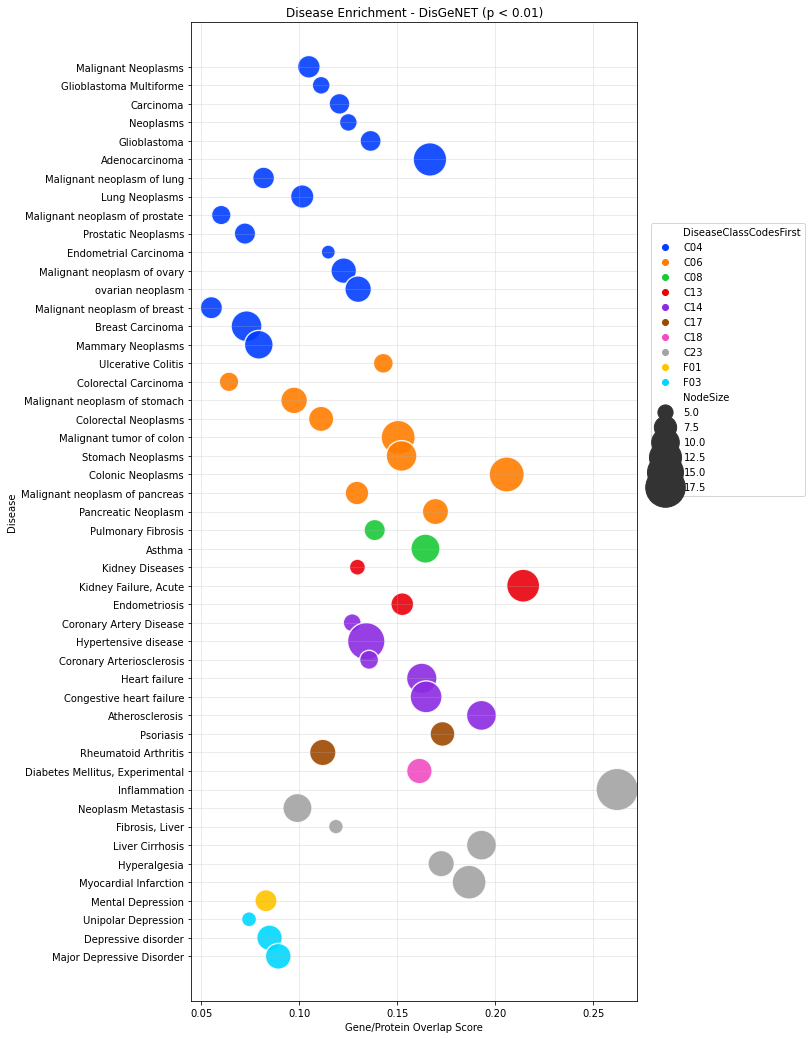

In [21]:
plt.figure(figsize = (8,18))
plt.grid(alpha=0.3)
plt.title('Disease Enrichment - DisGeNET (p < 0.01)')
plt.xlabel('Gene/Protein Overlap Score')
plt.ylabel('Disease')
sns.scatterplot(data=disgenet, x="OverlapRatio", y="Disease",size = 'NodeSize',sizes=(200,1800),hue='DiseaseClassCodesFirst',palette = 'bright',alpha=0.9)
plt.legend(bbox_to_anchor=(1.02,0.8))#, title = 'Disease Classes')
# plt.savefig('disease_bubbleplot_arialfont.pdf',bbox_inches='tight')
plt.show()

## Jaccard Similarity between diseases based on their gene similarity

In [22]:
# Jaccard SImilarity calculation between diseases
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float((intersection) / union)

In [26]:
connections = [['Disease1','Disease1Pvalue','Disease2Pvalue','Disease2','Jaccard_Index']]
oppconnections = []
for i in range(disgenet.shape[0]):
    node1 = disgenet['Disease'][i]
    genelist1 = list(set(disgenet['TotalGeneList'][i].split(';')))
    pv1 = disgenet['AdjustedPValue'][i]
    for j in range(disgenet.shape[0]):
        if j!=i:
            node2 = disgenet['Disease'][j]
            genelist2 = list(set(disgenet['TotalGeneList'][j].split(';')))
            pv2 = disgenet['AdjustedPValue'][j]
            jaccardindex = jaccard_similarity(genelist1,genelist2)
            edge = [node1,pv1,pv2,node2,jaccardindex]
            oppedge = [node2,pv2,pv1,node1,jaccardindex]
            if oppedge in oppconnections or edge in oppconnections: continue
            else:
                connections.append(edge)
                oppconnections.append(oppedge)
connectionsdf = pd.DataFrame(connections[1:],columns = connections[0])
print(connectionsdf.shape)
connectionsdf

(1176, 5)


,Disease1,Disease1Pvalue,Disease2Pvalue,Disease2,Jaccard_Index
0,Malignant Neoplasms,0.000468,0.002978,Glioblastoma Multiforme,0.078947
1,Malignant Neoplasms,0.000468,0.001045,Carcinoma,0.101064
2,Malignant Neoplasms,0.000468,0.002977,Neoplasms,0.504000
3,Malignant Neoplasms,0.000468,0.000918,Glioblastoma,0.073446
4,Malignant Neoplasms,0.000468,0.000002,Adenocarcinoma,0.126316
...,...,...,...,...,...
1171,Mental Depression,0.000581,0.000125,Depressive disorder,0.822314
1172,Mental Depression,0.000581,0.000113,Major Depressive Disorder,0.215116
1173,Unipolar Depression,0.007022,0.000125,Depressive disorder,0.230539
1174,Unipolar Depression,0.007022,0.000113,Major Depressive Disorder,0.694323


In [27]:
connectionsdf['Jaccard_Index'].max()

0.9411764705882353

In [28]:
connectionsdf['Jaccard_Index'].min()

0.0

In [29]:
# Considering the diseases connected with Jaccard similarity > 0.1
edges = connectionsdf[['Disease1','Disease2','Jaccard_Index']]
edges0_1 = edges[edges.Jaccard_Index > 0.1]
print(edges0_1.shape)
edges0_1

(157, 3)


,Disease1,Disease2,Jaccard_Index
1,Malignant Neoplasms,Carcinoma,0.101064
2,Malignant Neoplasms,Neoplasms,0.504000
4,Malignant Neoplasms,Adenocarcinoma,0.126316
5,Malignant Neoplasms,Malignant neoplasm of lung,0.106667
6,Malignant Neoplasms,Lung Neoplasms,0.124464
...,...,...,...
1171,Mental Depression,Depressive disorder,0.822314
1172,Mental Depression,Major Depressive Disorder,0.215116
1173,Unipolar Depression,Depressive disorder,0.230539
1174,Unipolar Depression,Major Depressive Disorder,0.694323


In [30]:
#saving the reulst as edge data for cytoscape network.
#edges0_1.to_excel('EDGE_disease_network.xlsx')